In [ ]:
# CELL 1: Import thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")
%matplotlib inline

In [ ]:
# CELL 2: Đọc dữ liệu
df = pd.read_csv('../data/Mall_Customers.csv')
print(f"Số hàng và cột: {df.shape}")
print("\n10 dòng đầu tiên:")
display(df.head(10))
print("\nTên các cột:")
print(df.columns.tolist())
print("\nCột chứa từ 'Cus':")
print([col for col in df.columns if 'Cus' in col])

Số hàng và cột: (200, 5)

10 dòng đầu tiên:


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72



Tên các cột:
['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

Cột chứa từ 'Cus':
['CustomerID']


Thống kê mô tả:


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000



Phân bố giới tính:
Gender
Female    112
Male       88
Name: count, dtype: int64


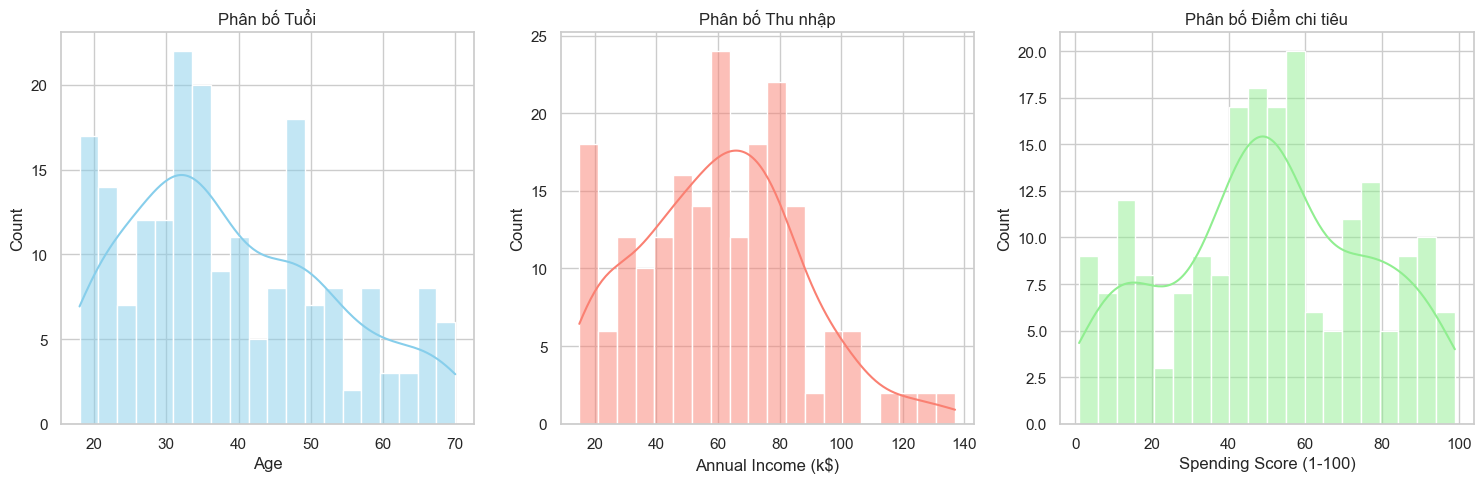

In [ ]:
# CELL 3: EDA (Phân tích khám phá)
print("Thống kê mô tả:")
display(df.describe())

print("\nPhân bố giới tính:")
print(df['Gender'].value_counts())

# Visualize
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')
plt.title('Phân bố Tuổi')

plt.subplot(1, 3, 2)
sns.histplot(df['Annual Income (k$)'], bins=20, kde=True, color='salmon')
plt.title('Phân bố Thu nhập')

plt.subplot(1, 3, 3)
sns.histplot(df['Spending Score (1-100)'], bins=20, kde=True, color='lightgreen')
plt.title('Phân bố Điểm chi tiêu')

plt.tight_layout()
plt.show()

In [4]:
# CELL 4: Tiền xử lý dữ liệu
# Mã hóa Gender
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Chọn 3 đặc trưng chính
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = df[features]

# Chuẩn hóa
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Dữ liệu đã được chuẩn hóa (mean ~ 0, std ~ 1)")
print(pd.DataFrame(X_scaled, columns=features).describe().round(2))

Dữ liệu đã được chuẩn hóa (mean ~ 0, std ~ 1)
          Age  Annual Income (k$)  Spending Score (1-100)
count  200.00              200.00                  200.00
mean    -0.00               -0.00                   -0.00
std      1.00                1.00                    1.00
min     -1.50               -1.74                   -1.91
25%     -0.72               -0.73                   -0.60
50%     -0.20                0.04                   -0.01
75%      0.73                0.67                    0.89
max      2.24                2.92                    1.89


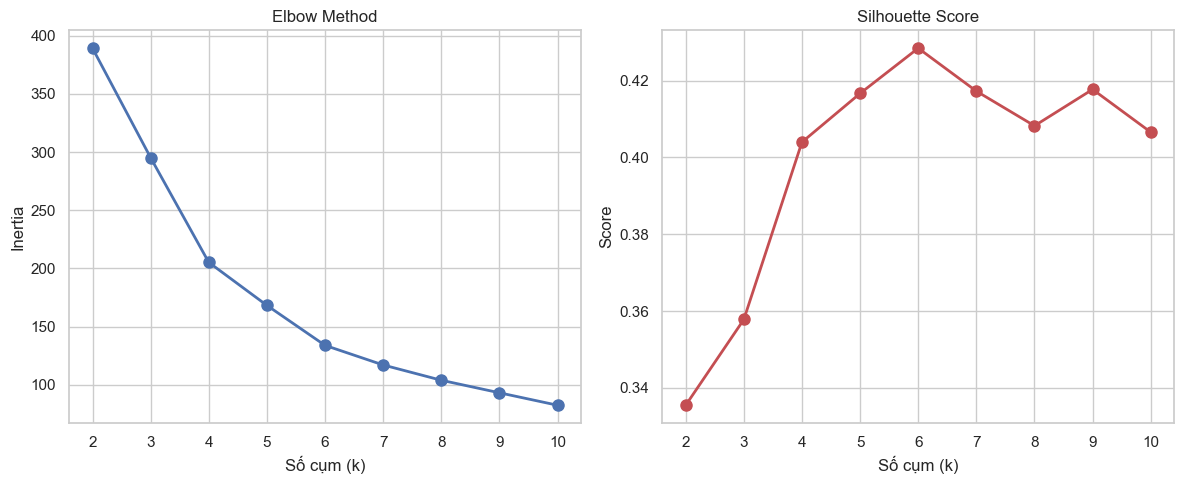

Silhouette Scores:
  k=2: 0.3355
  k=3: 0.3578
  k=4: 0.4040
  k=5: 0.4166
  k=6: 0.4284
  k=7: 0.4172
  k=8: 0.4082
  k=9: 0.4177
  k=10: 0.4066


In [ ]:
# CELL 5: Tìm số cụm tối ưu (Elbow + Silhouette)
inertias = []
sil_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Vẽ đồ thị
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(K, inertias, 'bo-', linewidth=2, markersize=8)
plt.title('Elbow Method')
plt.xlabel('Số cụm (k)')
plt.ylabel('Inertia')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(K, sil_scores, 'ro-', linewidth=2, markersize=8)
plt.title('Silhouette Score')
plt.xlabel('Số cụm (k)')
plt.ylabel('Score')
plt.grid(True)

plt.tight_layout()
plt.show()

# In kết quả
print("Silhouette Scores:")
for k, score in zip(K, sil_scores):
    print(f"  k={k}: {score:.4f}")

In [6]:
# CELL 6: Huấn luyện K-Means (k=5)
# Huấn luyện cuối cùng
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Đánh giá
score = silhouette_score(X_scaled, df['Cluster'])
print(f"Silhouette Score (k=5): {score:.4f}")

Silhouette Score (k=5): 0.4166


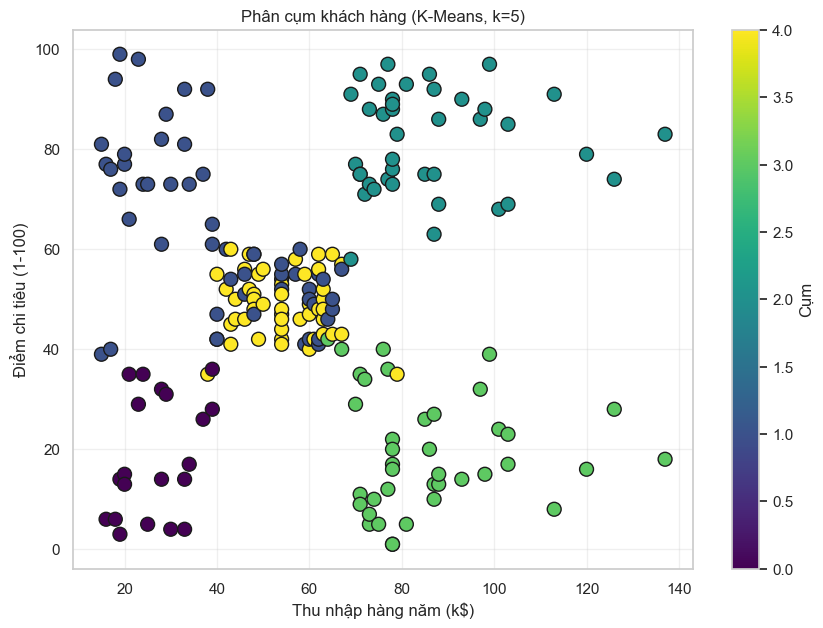

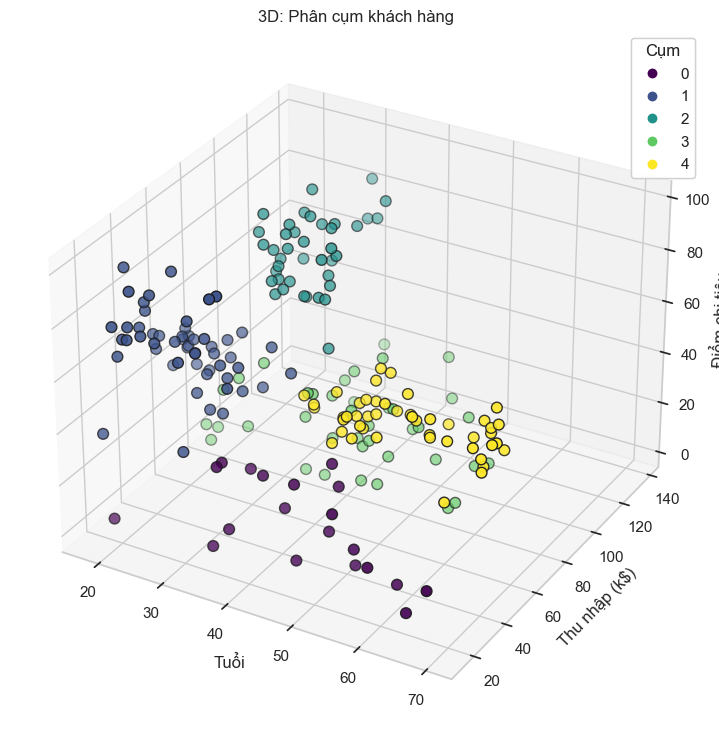

In [7]:
# CELL 7: Visualize kết quả
# 2D: Thu nhập vs Điểm chi tiêu
plt.figure(figsize=(10, 7))
scatter = plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'],
                     c=df['Cluster'], cmap='viridis', s=100, edgecolors='k')
plt.xlabel('Thu nhập hàng năm (k$)')
plt.ylabel('Điểm chi tiêu (1-100)')
plt.title('Phân cụm khách hàng (K-Means, k=5)')
plt.colorbar(scatter, label='Cụm')
plt.grid(True, alpha=0.3)
plt.show()

# 3D Plot
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df['Age'], 
                     df['Annual Income (k$)'], 
                     df['Spending Score (1-100)'],
                     c=df['Cluster'], cmap='viridis', s=60, edgecolors='k')

ax.set_xlabel('Tuổi')
ax.set_ylabel('Thu nhập (k$)')
ax.set_zlabel('Điểm chi tiêu')
plt.title('3D: Phân cụm khách hàng')
legend = plt.legend(*scatter.legend_elements(), title="Cụm", loc="upper right")
ax.add_artist(legend)
plt.show()

Trung bình đặc trưng theo cụm:


,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,46.25,26.75,18.35
1,25.19,41.09,62.24
2,32.88,86.10,81.53
3,39.87,86.10,19.36
4,55.64,54.38,48.85


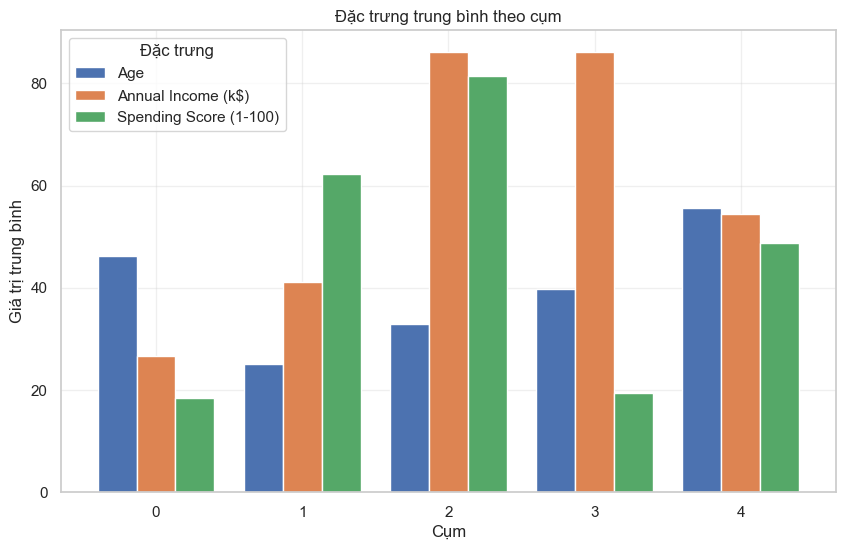

In [8]:
# CELL 8: Phân tích từng cụm
cluster_summary = df.groupby('Cluster')[features].mean().round(2)
print("Trung bình đặc trưng theo cụm:")
display(cluster_summary)

# Visualize
cluster_summary.plot(kind='bar', figsize=(10, 6), width=0.8)
plt.title('Đặc trưng trung bình theo cụm')
plt.ylabel('Giá trị trung bình')
plt.xlabel('Cụm')
plt.legend(title='Đặc trưng')
plt.xticks(rotation=0)
plt.grid(True, alpha=0.3)
plt.show()